# 연습

#### 패키지 불러오기

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#### 그래프 옵션 지정

In [2]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 구성하기

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("Big Data 분석/HMEQ.CSV")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


#### 결측치 처리

In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

# 결측치 없음

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 열만 선택하여 평균값으로 결측치 대체
numeric_cols = df_raw.select_dtypes(include=['number']).columns
df_raw[numeric_cols] = df_raw[numeric_cols].fillna(df_raw[numeric_cols].mean())

In [7]:
# 결측치 재확인
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 범주형 설명변수 더미 변환

In [8]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,False,True,False,False,True,False,False,False
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,False,True,False,False,True,False,False,False
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,False,True,False,True,False,False,False,False
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,False,True,True,False,False,False,False,False
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,False,True,False,True,False,False,False,False


#### 데이터 분리: 목표변수 vs. 설명변수

In [9]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"] 

#### 데이터 분할

In [10]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (3748, 18)
분할 후 설명변수 데이터 :Train (2623, 18)   Test (1125, 18)


In [11]:
display(df_raw.head(10))
display(df_raw_x.head(10))

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
5,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859
7,1,2900,7750,67996.0,HomeImp,Other,16.0,3,0.0,122.204663,2.0,8,36.211348
8,1,2900,61962,70915.0,DebtCon,Mgr,2.0,0,0.0,282.801659,3.0,37,49.206396
9,0,3000,104570,121729.0,HomeImp,Office,2.0,0,0.0,85.884372,0.0,14,32.059783


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,False,True,False,False,True,False,False,False
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,False,True,False,False,True,False,False,False
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,False,True,False,True,False,False,False,False
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,False,True,True,False,False,False,False,False
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,False,True,False,True,False,False,False,False
5,2900,103949,112505.0,1.0,0,0.0,96.102330,0.0,13,30.051136,False,True,False,True,False,False,False,False
6,2900,104373,120702.0,2.0,0,0.0,101.540297,0.0,13,29.915859,False,True,False,True,False,False,False,False
7,2900,7750,67996.0,16.0,3,0.0,122.204663,2.0,8,36.211348,False,True,False,False,True,False,False,False
8,2900,61962,70915.0,2.0,0,0.0,282.801659,3.0,37,49.206396,True,False,True,False,False,False,False,False
9,3000,104570,121729.0,2.0,0,0.0,85.884372,0.0,14,32.059783,False,True,False,True,False,False,False,False


In [12]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

변수 :  Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')


## 모델 생성

### 기본 옵션 모델

In [13]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [14]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


#### @learning_rate(학습률) 변화에 따른 모델 성능

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [16]:
para_lr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [17]:
# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


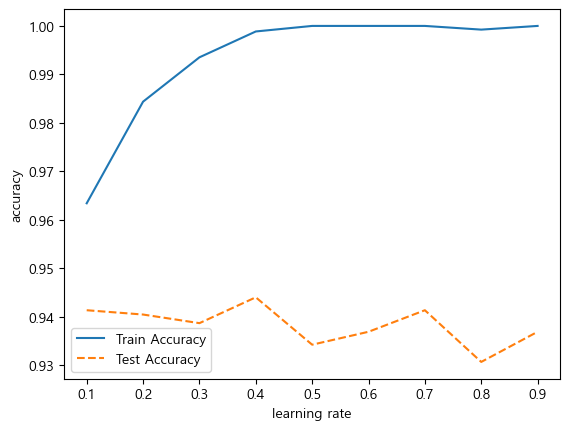

In [18]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

#### @n_estimators: 트리의 개수 변경에 따른 모델 성능

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [20]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [21]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


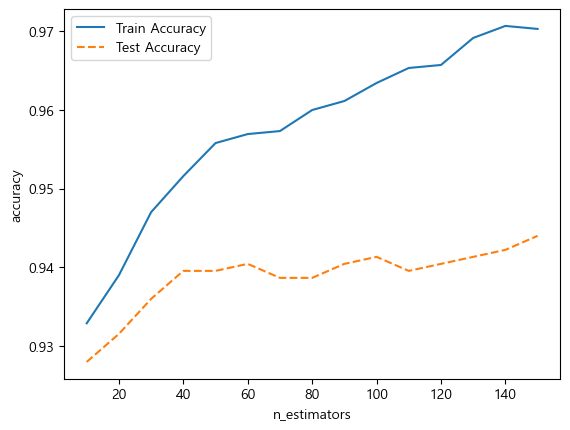

In [22]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

#### @max_depth: 최대 깊이 변경에 따른 모델 성능

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [24]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.940
5,6,0.998,0.950
6,7,1.000,0.947
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


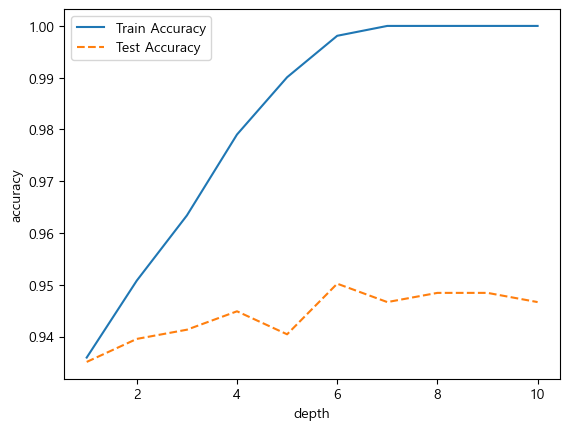

In [26]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

#### @min_samples_split: 분리 노드의 최소 샘플 수 변경에 따른 모델 성능

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [28]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [29]:
# min_samples_leaf별 정확도 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.995,0.942
1,30,0.994,0.940
2,40,0.992,0.945
3,50,0.992,0.942
4,60,0.989,0.947
5,70,0.988,0.943
6,80,0.986,0.944
7,90,0.987,0.945
8,100,0.984,0.944


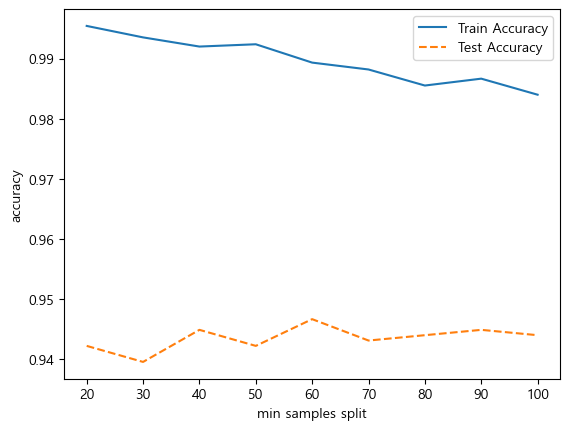

In [30]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

#### @min_samples_leaf: leaf 수 변경에 따른 모델 성능

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [32]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [33]:
# min_samples_leaf별 정확도 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.998,0.943
1,10,0.995,0.948
2,15,0.991,0.949
3,20,0.990,0.948
4,25,0.987,0.945
5,30,0.984,0.943
6,35,0.984,0.943
7,40,0.982,0.944
8,45,0.982,0.943
9,50,0.978,0.943


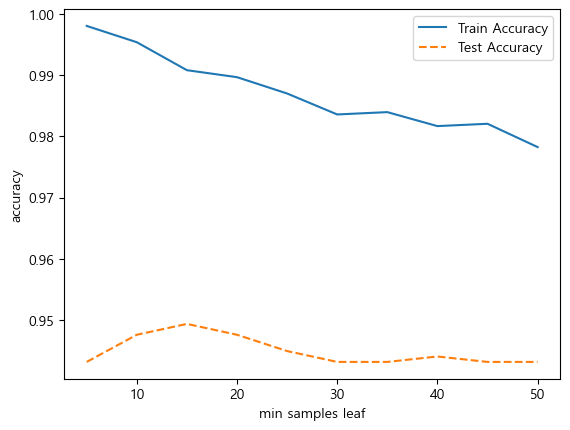

In [34]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

## 결론 도출

#### 최종 모델 선택

In [35]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, learning_rate=0.1, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.991
Test Accuracy: 0.949

Test Confusion matrix: 
[[1020    1]
 [  56   48]]
              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



#### 설명변수 중요도

In [36]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
9,DEBTINC,0.331
6,CLAGE,0.132
2,VALUE,0.105
5,DELINQ,0.096
8,CLNO,0.076
0,LOAN,0.069
3,YOJ,0.048
7,NINQ,0.041
1,MORTDUE,0.037
4,DEROG,0.035


Text(0, 0.5, '설명변수')

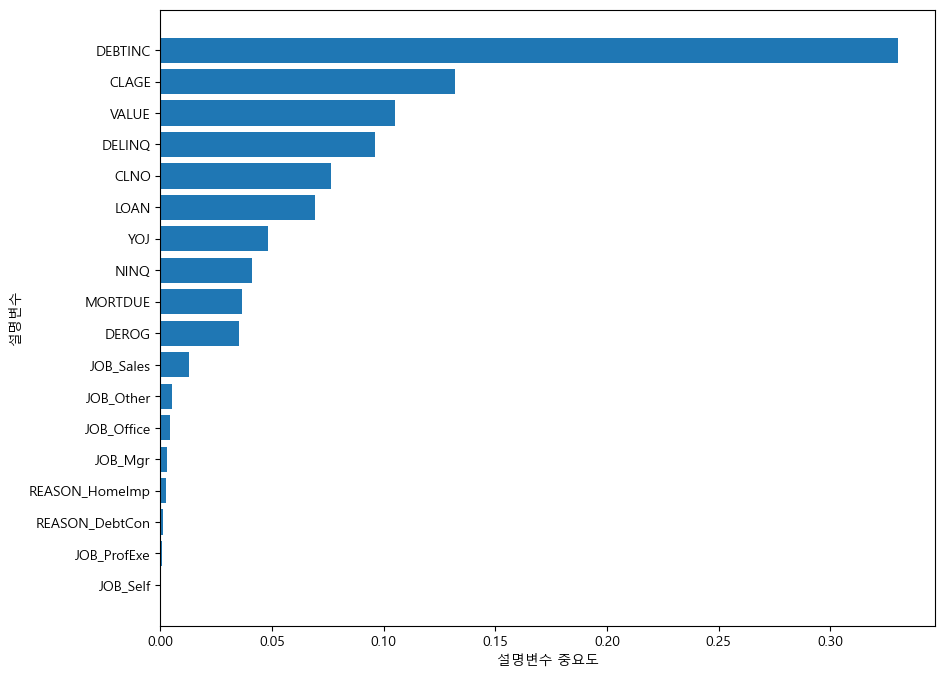

In [37]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### 참조:Grid Search

## @xgboost 연습

### @sklearn Framework 기반의 XGBoost 연습

특징
. 사이킷런의 기본 Estimator를 이용해 만들어 fit()과 predict()만으로 학습과 예측이 가능

. GridSearchCV,Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능
. 분류 : XGBClassifier / 회귀 : XGBRegressor

eta → learning_rate
sub_sample → subsample
lambda → reg_lambda
alpha → reg_alpha
num_boost_round → n_estimators

In [38]:
# !pip install xgboost

In [40]:
pip install xgboost==1.7.1

   ---------------------------------------- 0.0/89.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/89.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/89.1 MB 325.1 kB/s eta 0:04:35
   ---------------------------------------- 0.1/89.1 MB 744.7 kB/s eta 0:02:00
   ---------------------------------------- 0.2/89.1 MB 1.6 MB/s eta 0:00:56
   ---------------------------------------- 0.5/89.1 MB 2.3 MB/s eta 0:00:39
   ---------------------------------------- 0.7/89.1 MB 2.9 MB/s eta 0:00:30
   ---------------------------------------- 1.0/89.1 MB 3.2 MB/s eta 0:00:28
    --------------------------------------- 1.2/89.1 MB 3.4 MB/s eta 0:00:26
    --------------------------------------- 1.4/89.1 MB 3.5 MB/s eta 0:00:26
    --------------------------------------- 1.6/89.1 MB 3.6 MB/s eta 0:00:25
    --------------------------------------- 1.8/89.1 MB 3.7 MB/s eta 0:00:24
    --------------------------------------- 2.0/89.1 MB 3.7 MB/s eta 0:00:24
    -----

In [41]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


In [42]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [43]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1019    2]
 [  58   46]] 

정확도: 0.9467
정밀도: 0.9583
재현율: 0.4423
F1    : 0.6053
AUC   : 0.7202


In [44]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  49  192]] 

정확도: 0.9813
정밀도: 1.0000
재현율: 0.7967
F1    : 0.8868
AUC   : 0.8983

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  63   41]] 

정확도: 0.9431
정밀도: 0.9762
재현율: 0.3942
F1    : 0.5616
AUC   : 0.6966

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [54]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]
xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 
             eval_metric="logloss", early_stopping_rounds = 150, eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20589
[28]	validation_0-logloss:0.20396
[29]	validation_0-loglos

C:\Users\gksxk\anaconda3\Lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.19692
[37]	validation_0-logloss:0.19629
[38]	validation_0-logloss:0.19585
[39]	validation_0-logloss:0.19575
[40]	validation_0-logloss:0.19473
[41]	validation_0-logloss:0.19445
[42]	validation_0-logloss:0.19447
[43]	validation_0-logloss:0.19413
[44]	validation_0-logloss:0.19427
[45]	validation_0-logloss:0.19340
[46]	validation_0-logloss:0.19326
[47]	validation_0-logloss:0.19208
[48]	validation_0-logloss:0.19208
[49]	validation_0-logloss:0.19181
[50]	validation_0-logloss:0.19102
[51]	validation_0-logloss:0.19055
[52]	validation_0-logloss:0.19050
[53]	validation_0-logloss:0.19086
[54]	validation_0-logloss:0.19073
[55]	validation_0-logloss:0.19130
[56]	validation_0-logloss:0.19120
[57]	validation_0-logloss:0.19116
[58]	validation_0-logloss:0.19089
[59]	validation_0-logloss:0.19063
[60]	validation_0-logloss:0.19077
[61]	validation_0-logloss:0.19067
[62]	validation_0-logloss:0.19030
[63]	validation_0-logloss:0.18936
[64]	validation_0-logloss:0.18943
[65]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1234, ...)

In [55]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 88
최적 성능(0-LogLoss): 0.18778899103175434


In [56]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  62   42]] 

정확도: 0.9440
정밀도: 0.9767
재현율: 0.4038
F1    : 0.5714
AUC   : 0.7014

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.40      0.57       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



{'LOAN': 494.0, 'MORTDUE': 525.0, 'VALUE': 565.0, 'YOJ': 421.0, 'DEROG': 95.0, 'DELINQ': 208.0, 'CLAGE': 545.0, 'NINQ': 165.0, 'CLNO': 445.0, 'DEBTINC': 592.0, 'REASON_DebtCon': 63.0, 'JOB_Mgr': 20.0, 'JOB_Office': 50.0, 'JOB_Other': 75.0, 'JOB_ProfExe': 31.0, 'JOB_Sales': 57.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

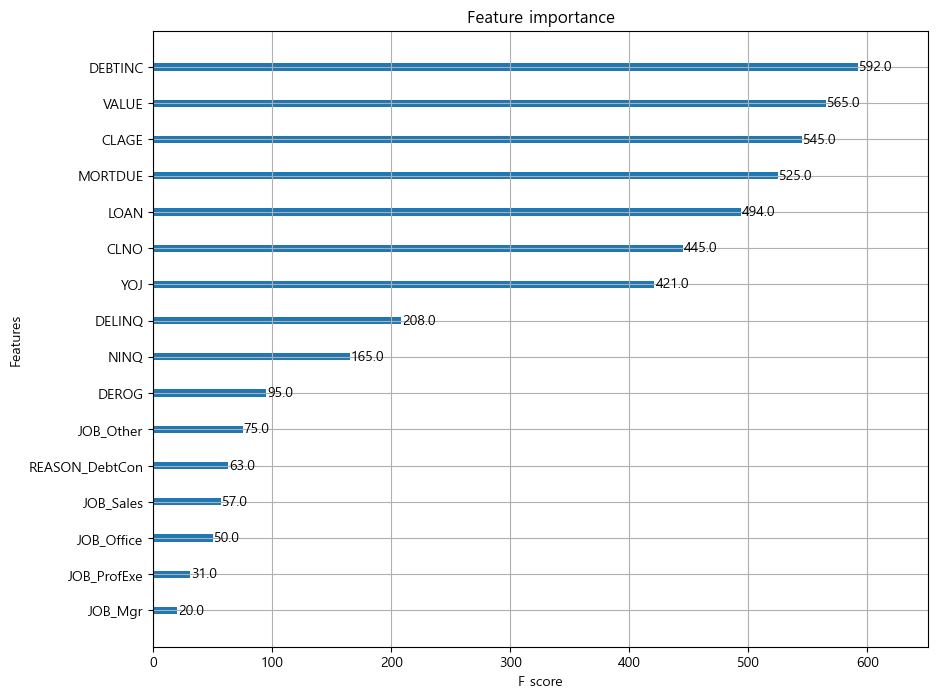

In [57]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

In [58]:
# importance_type 변경 가능
# plot_importance(xgb_stop, importance_type='gain', ax=ax)

## @LightGBM 연습

In [70]:
pip install lightgbm==3.3.2 

Note: you may need to restart the kernel to use updated packages.


### @sklearn Framework 기반의 LightGBM 연습

* 설치 : !pip install lightgbm 또는 conda install lightgbm

* 특징
    - Leaf-wise 분할방식: 최대 손실 값을 가지는 리프 노드를 지속적으로 분할 -> 비대칭 트리가 생성됨
    - XGBoost 보다 학습 소요시간 및 메모리 등 시스템 자원 사용량이 상대적으로 적다
    - 범주형 설명변수의 자동 변환과 최적 분할 지원(One-Hot Encoding을 적용하지 않아도 분할 가능)

* 모델 : 분류-LGBMClassifier, 예측-LGBMRegressor

* 주요 Hyper-parameter
        - n_estimators [default: 100]: GBM과 XGB의 n_estimators와 같은 파라미터

learning_rate [defalut: 0.1]: GBM과 XGB의 학습률(learning_rate)과 같은 파라미터, 일반적으로 n_estimators를 높이고 learning_rate를 낮추면 예측 성능이 향상하지만 마찬가지로 과적합 이슈 및 소요 시간 증가의 문제가 있다.

max_depth [default: 1]: 트리 기반 알고리즘의 max_depth와 같다. 0보다 작은 값을 지정하면 깊이 제한이 없다. LightGBM은 Leaf Wise 방식이므로 깊이가 상대적으로 더 깊다.

min_child_samples [default: 20]: 결정 트리의 min_samples_leaf와 같은 파라미터로 리프 노드가 되기 위해 최소한으로 필요한 샘플 수

num_leaves [default: 31]: 하나의 트리가 가질 수 있는 최대 리프 개수

boosting [default: gbdt]: 부스팅의 트리를 생성하는 알고리즘을 지정하며 gbdt는 일반적인 그래디언트 부스팅 결정 트리이며 rf는 랜덤 포레스트이다.

subsample [default: 1]: GBM과 XGB의 subsample과 같은 파라미터

colsample_bytree [default: 1]: XGB의 colsample_bytree와 같은 파라미터로 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율

reg_lambda [default: 0]: XGB의 reg_lambda와 같은 파라미터로 L2 regulation 제어를 위한 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.

reg_alpha [default: 0]: XGB의 reg_alpha와 같은 파라미터로 L1 regulation 제어를 위한 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.

학습 태스크 파라미터

objective: 최솟값을 가져야할 손실함수를 정의한다. XGB의 objective 파라미터와 동일하다.

    - num_leaves:개별 트리가 가질 수 있는 최대 리프 수
    - min_data_in_leaf:리프의 최소 자료 수. min_child_samples
    - max_depth:최대 (가능) 깊이

In [71]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [72]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [73]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1    : 0.5960
AUC   : 0.7154


In [74]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  11  230]] 

정확도: 0.9958
정밀도: 1.0000
재현율: 0.9544
F1    : 0.9766
AUC   : 0.9772

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2382
           1       1.00      0.95      0.98       241

    accuracy                           1.00      2623
   macro avg       1.00      0.98      0.99      2623
weighted avg       1.00      1.00      1.00      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  58   46]] 

정확도: 0.9467
정밀도: 0.9583
재현율: 0.4423
F1    : 0.6053
AUC   : 0.7202

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       0.96      0.44      0.61       104

    accuracy                           0.95      1125
   macro avg       0.95      0.72      0.79      1125
weighted avg       0.95      0.95      0.94      1125



In [75]:
# sklearn lightgbm 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y, 
              # 조기 중단 파라미터
              early_stopping_rounds = 200, eval_metric="logloss", eval_set = eval_df, verbose=True)

[1]	valid_0's binary_logloss: 0.28511
[2]	valid_0's binary_logloss: 0.27066
[3]	valid_0's binary_logloss: 0.260079
[4]	valid_0's binary_logloss: 0.252409
[5]	valid_0's binary_logloss: 0.245952
[6]	valid_0's binary_logloss: 0.240127
[7]	valid_0's binary_logloss: 0.235029
[8]	valid_0's binary_logloss: 0.2314
[9]	valid_0's binary_logloss: 0.227222
[10]	valid_0's binary_logloss: 0.223771
[11]	valid_0's binary_logloss: 0.220513
[12]	valid_0's binary_logloss: 0.217729
[13]	valid_0's binary_logloss: 0.21576
[14]	valid_0's binary_logloss: 0.214048
[15]	valid_0's binary_logloss: 0.211407
[16]	valid_0's binary_logloss: 0.209553
[17]	valid_0's binary_logloss: 0.207832
[18]	valid_0's binary_logloss: 0.205522
[19]	valid_0's binary_logloss: 0.203077
[20]	valid_0's binary_logloss: 0.202195
[21]	valid_0's binary_logloss: 0.201263
[22]	valid_0's binary_logloss: 0.200804
[23]	valid_0's binary_logloss: 0.199671
[24]	valid_0's binary_logloss: 0.199349
[25]	valid_0's binary_logloss: 0.198783
[26]	valid_0's

C:\Users\gksxk\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\gksxk\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[169]	valid_0's binary_logloss: 0.202762
[170]	valid_0's binary_logloss: 0.202928
[171]	valid_0's binary_logloss: 0.203391
[172]	valid_0's binary_logloss: 0.203603
[173]	valid_0's binary_logloss: 0.20391
[174]	valid_0's binary_logloss: 0.203704
[175]	valid_0's binary_logloss: 0.20402
[176]	valid_0's binary_logloss: 0.204663
[177]	valid_0's binary_logloss: 0.204957
[178]	valid_0's binary_logloss: 0.205031
[179]	valid_0's binary_logloss: 0.205416
[180]	valid_0's binary_logloss: 0.205726
[181]	valid_0's binary_logloss: 0.205819
[182]	valid_0's binary_logloss: 0.206089
[183]	valid_0's binary_logloss: 0.206273
[184]	valid_0's binary_logloss: 0.206893
[185]	valid_0's binary_logloss: 0.207233
[186]	valid_0's binary_logloss: 0.207327
[187]	valid_0's binary_logloss: 0.207733
[188]	valid_0's binary_logloss: 0.208092
[189]	valid_0's binary_logloss: 0.207711
[190]	valid_0's binary_logloss: 0.208811
[191]	valid_0's binary_logloss: 0.209339
[192]	valid_0's binary_logloss: 0.209511
[193]	valid_0's bi

LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)

In [76]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

최적 횟수: 82
최적 성능(0-LogLoss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.1832810251645084)])})


In [77]:
# 참조!!! 모델 결과 확인
print(lgbm_stop.boosting_type)  # gbdt
print(lgbm_stop.class_weight)  # None
print(lgbm_stop.classes_)  # [0 1]
print(lgbm_stop.colsample_bytree)  # 1.0
# print(lgbm_stop.evals_result_)  # {'valid_0': OrderedDict([('binary_logloss', [0.28510

# print(lgbm_stop.evals_result_)  # 
print(lgbm_stop.feature_name_)  # 
print(lgbm_stop.feature_importances_)  # 

print(lgbm_stop.fit)  # <bound method LGBMClassifier.fit of LGBMClassifier(max_depth=6, n_estimators=300)>
print(lgbm_stop.fitted_)  # True
print(lgbm_stop.importance_type)  # split


print(lgbm_stop.learning_rate)  # 0.1
print(lgbm_stop.min_child_samples)  # 20 
print(lgbm_stop.n_classes_)  # 2
print(lgbm_stop.num_leaves)  # 31
print(lgbm_stop.objective)  # None
print(lgbm_stop.objective_)  # binary
print(lgbm_stop.predict)  # 
print(lgbm_stop.predict_proba)  # 
print(lgbm_stop.reg_alpha)  # 0.0
print(lgbm_stop.reg_lambda)  # 0.0
print(lgbm_stop.subsample_for_bin)  # 200000

gbdt
None
[0 1]
1.0
['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[195 172 188 144  51  89 181  77 170 218  20   1   8  12  24   7  20   0]
<bound method LGBMClassifier.fit of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
True
split
0.1
20
2
31
None
binary
<bound method LGBMClassifier.predict of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
<bound method LGBMClassifier.predict_proba of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
0.0
0.0
200000


In [78]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1    : 0.5960
AUC   : 0.7154

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       0.96      0.43      0.60       104

    accuracy                           0.95      1125
   macro avg       0.95      0.72      0.78      1125
weighted avg       0.95      0.95      0.94      1125



['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[195 172 188 144  51  89 181  77 170 218  20   1   8  12  24   7  20   0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

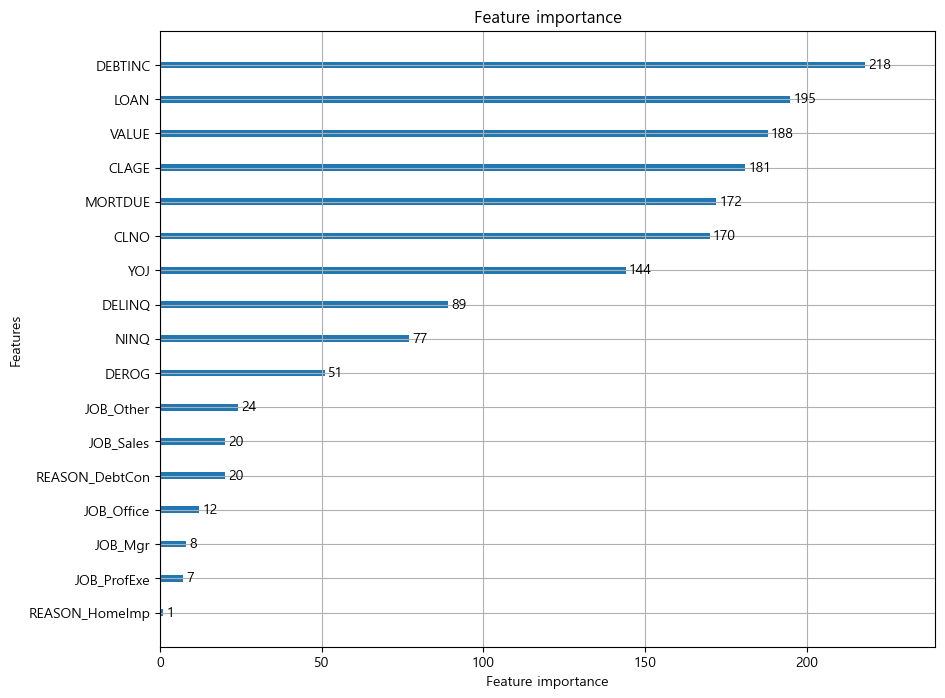

In [79]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

## @Categorical Boosting 연습

In [82]:
# package 설치
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 435.7 kB/s eta 0:03:53
   ---------------------------------------- 0.2/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.4/101.1 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.7/101.1 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/101.1 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.4/101.1 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.5/101.1 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.9/101.1 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 2.2/101.1 MB 5.0 MB/s eta 0:00:20
   - -------------------------------------- 2.5/101.1 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 2.9/101.1 MB 5.5 MB/s eta 0:00:1

In [83]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [84]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x00000202D665C9D0>>

In [85]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.015551
0:	learn: 0.6761244	total: 146ms	remaining: 2m 25s
1:	learn: 0.6579079	total: 149ms	remaining: 1m 14s
2:	learn: 0.6399682	total: 151ms	remaining: 50.3s
3:	learn: 0.6239700	total: 154ms	remaining: 38.3s
4:	learn: 0.6084344	total: 156ms	remaining: 31.1s
5:	learn: 0.5945777	total: 159ms	remaining: 26.3s
6:	learn: 0.5799344	total: 161ms	remaining: 22.9s
7:	learn: 0.5669553	total: 164ms	remaining: 20.3s
8:	learn: 0.5532509	total: 166ms	remaining: 18.3s
9:	learn: 0.5408740	total: 169ms	remaining: 16.7s
10:	learn: 0.5292223	total: 172ms	remaining: 15.4s
11:	learn: 0.5169985	total: 174ms	remaining: 14.3s
12:	learn: 0.5058216	total: 177ms	remaining: 13.4s
13:	learn: 0.4967484	total: 179ms	remaining: 12.6s
14:	learn: 0.4867250	total: 182ms	remaining: 11.9s
15:	learn: 0.4766792	total: 184ms	remaining: 11.3s
16:	learn: 0.4678698	total: 187ms	remaining: 10.8s
17:	learn: 0.4583963	total: 192ms	remaining: 10.5s
18:	learn: 0.4496975	total: 195ms	remaining: 10s
19:	learn: 

In [86]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5909199	total: 6.19ms	remaining: 1.23s
1:	learn: 0.5032732	total: 12.1ms	remaining: 1.2s
2:	learn: 0.4353241	total: 17.1ms	remaining: 1.13s
3:	learn: 0.3862375	total: 22ms	remaining: 1.08s
4:	learn: 0.3517100	total: 26.1ms	remaining: 1.02s
5:	learn: 0.3239240	total: 32.1ms	remaining: 1.04s
6:	learn: 0.3018276	total: 38ms	remaining: 1.05s
7:	learn: 0.2850184	total: 43.9ms	remaining: 1.05s
8:	learn: 0.2697382	total: 48.8ms	remaining: 1.03s
9:	learn: 0.2581893	total: 52.9ms	remaining: 1s
10:	learn: 0.2468526	total: 58.3ms	remaining: 1s
11:	learn: 0.2364921	total: 63.8ms	remaining: 999ms
12:	learn: 0.2284698	total: 69.1ms	remaining: 994ms
13:	learn: 0.2239990	total: 73.8ms	remaining: 980ms
14:	learn: 0.2174115	total: 78.4ms	remaining: 967ms
15:	learn: 0.2116582	total: 83.8ms	remaining: 964ms
16:	learn: 0.2067886	total: 89.7ms	remaining: 966ms
17:	learn: 0.2039374	total: 93.9ms	remaining: 950ms
18:	learn: 0.1986265	total: 98.9ms	remaining: 942ms
19:	learn: 0.1962122	total: 103ms

In [87]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.5909199	test: 0.5906622	best: 0.5906622 (0)	total: 9.56ms	remaining: 2.86s
1:	learn: 0.5032732	test: 0.5053610	best: 0.5053610 (1)	total: 18.5ms	remaining: 2.75s
2:	learn: 0.4353241	test: 0.4377785	best: 0.4377785 (2)	total: 27.6ms	remaining: 2.73s
3:	learn: 0.3862375	test: 0.3906700	best: 0.3906700 (3)	total: 34.9ms	remaining: 2.58s
4:	learn: 0.3517100	test: 0.3599815	best: 0.3599815 (4)	total: 41.9ms	remaining: 2.47s
5:	learn: 0.3239240	test: 0.3335359	best: 0.3335359 (5)	total: 48.2ms	remaining: 2.36s
6:	learn: 0.3018276	test: 0.3128835	best: 0.3128835 (6)	total: 52.8ms	remaining: 2.21s
7:	learn: 0.2850184	test: 0.2972508	best: 0.2972508 (7)	total: 57.7ms	remaining: 2.1s
8:	learn: 0.2697382	test: 0.2841419	best: 0.2841419 (8)	total: 63.5ms	remaining: 2.05s
9:	learn: 0.2581893	test: 0.2748417	best: 0.2748417 (9)	total: 69.9ms	remaining: 2.03s
10:	learn: 0.2468526	test: 0.2659877	best: 0.2659877 (10)	total: 75.7ms	remaining: 1.99s
11:	learn: 0.2364921	test: 0.2571756	best:

In [88]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 154
최적 성능: {'learn': {'Logloss': 0.019986015048234506}, 'validation': {'Logloss': 0.17481312773624946}}


In [89]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1021    0]
 [  56   48]] 

정확도: 0.9502
정밀도: 1.0000
재현율: 0.4615
F1    : 0.6316
AUC   : 0.7308

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.46      0.63       104

    accuracy                           0.95      1125
   macro avg       0.97      0.73      0.80      1125
weighted avg       0.95      0.95      0.94      1125



In [90]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 8.48192368 10.1545335   6.99018232 10.55202983  2.79864521  7.93223236
 12.19986926  6.62398258  9.80529685 13.95290347  0.74700744  1.10396813
  1.58618178  1.59255053  2.00890259  2.25362825  1.01649621  0.19966599]


In [91]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
9,DEBTINC,13.953
6,CLAGE,12.200
3,YOJ,10.552
1,MORTDUE,10.155
8,CLNO,9.805
0,LOAN,8.482
5,DELINQ,7.932
2,VALUE,6.990
7,NINQ,6.624
4,DEROG,2.799


Text(0, 0.5, '설명변수')

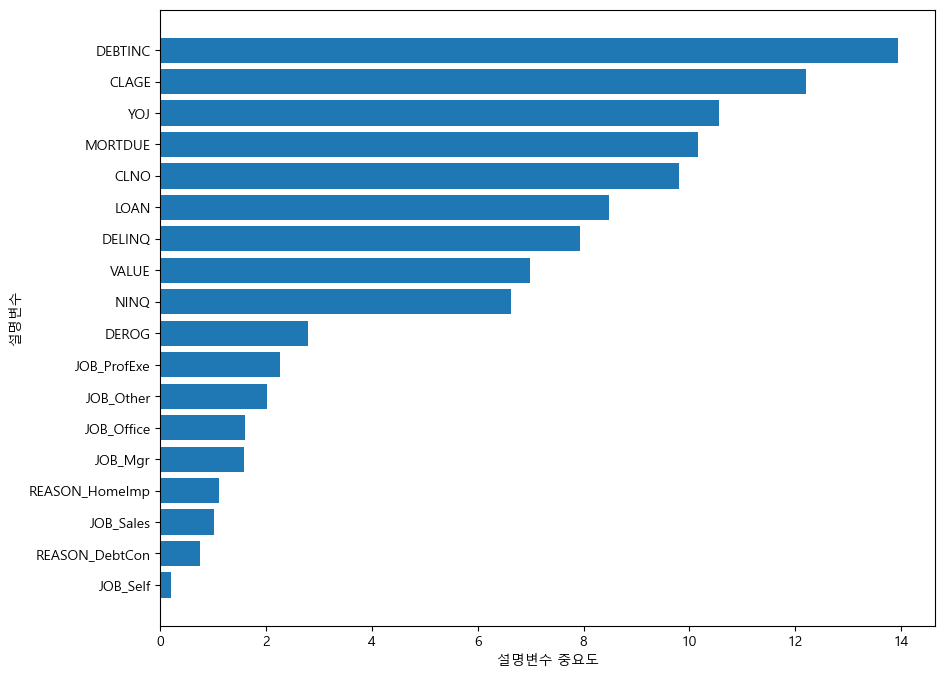

In [92]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")